# Import
- https://towardsdatascience.com/clustering-made-easy-with-pycaret-656316c0b080

In [ ]:
!pip install --user --upgrade tables
!pip install --user pycaret

In [ ]:
# !pip install pycaret[full]==2.3.4
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.

In [ ]:
# Install or upgrade required libraries
!pip install pandas scikit-learn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.clustering import *
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [ ]:
region=2
csv_file_path = f'/content/drive/MyDrive/MS thesis/HFCAI/RG{region}/rg{region}_HCFAI.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)
df.sort_values(by='HCFAI', ascending=False).head(2)

,ID,barangay_name,city_name,province_name,popden_chi,popden_eld,popden_wom,popden_w_1,popden_you,popden_all,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,HCFAI
555,3000846,Canabuan,Santa Fe,Nueva Vizcaya,0.364939,0.170465,1.486166,0.65545,0.703468,0.283942,0.154263,0.678594,0.681410,1.0,0,1,1,3010498,38.201450,0.657968
328,2992549,Balite,Aritao,Nueva Vizcaya,1.057736,0.616637,5.045625,1.79590,2.732109,2.415457,0.092563,0.651985,0.747831,1.0,0,1,1,3010498,34.286708,0.657165


In [ ]:
for i in df.columns:
  print(i)

ID
barangay_name
city_name
province_name
popden_chi
popden_eld
popden_wom
popden_w_1
popden_you
popden_all
flood_probability_value
rain intensity_value
drought_value
buildability_landcov
RHU_Presence
Road_Presence
POI_Presence
Nearest_RHU
Distance_to_Nearest_RHU_km
HCFAI


# K-means on HCFAI

In [ ]:
IDonly = df['ID']
IDdf = IDonly.to_frame()
IDdf

,ID
0,2971819
1,2971820
2,2971821
3,2973198
4,2973199
...,...
10512,3151422
10513,3151423
10514,3151424
10515,3151425


In [ ]:
HCIdf = df[['HCFAI']]
# HCIdf = HCIdf.to_frame()
cluster = setup(HCIdf, session_id = 7652)

,Description,Value
0,Session id,7652
1,Original data shape,"(10517, 1)"
2,Transformed data shape,"(10517, 1)"
3,Numeric features,1
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [ ]:
model = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5695,41500.7531,0.5199,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

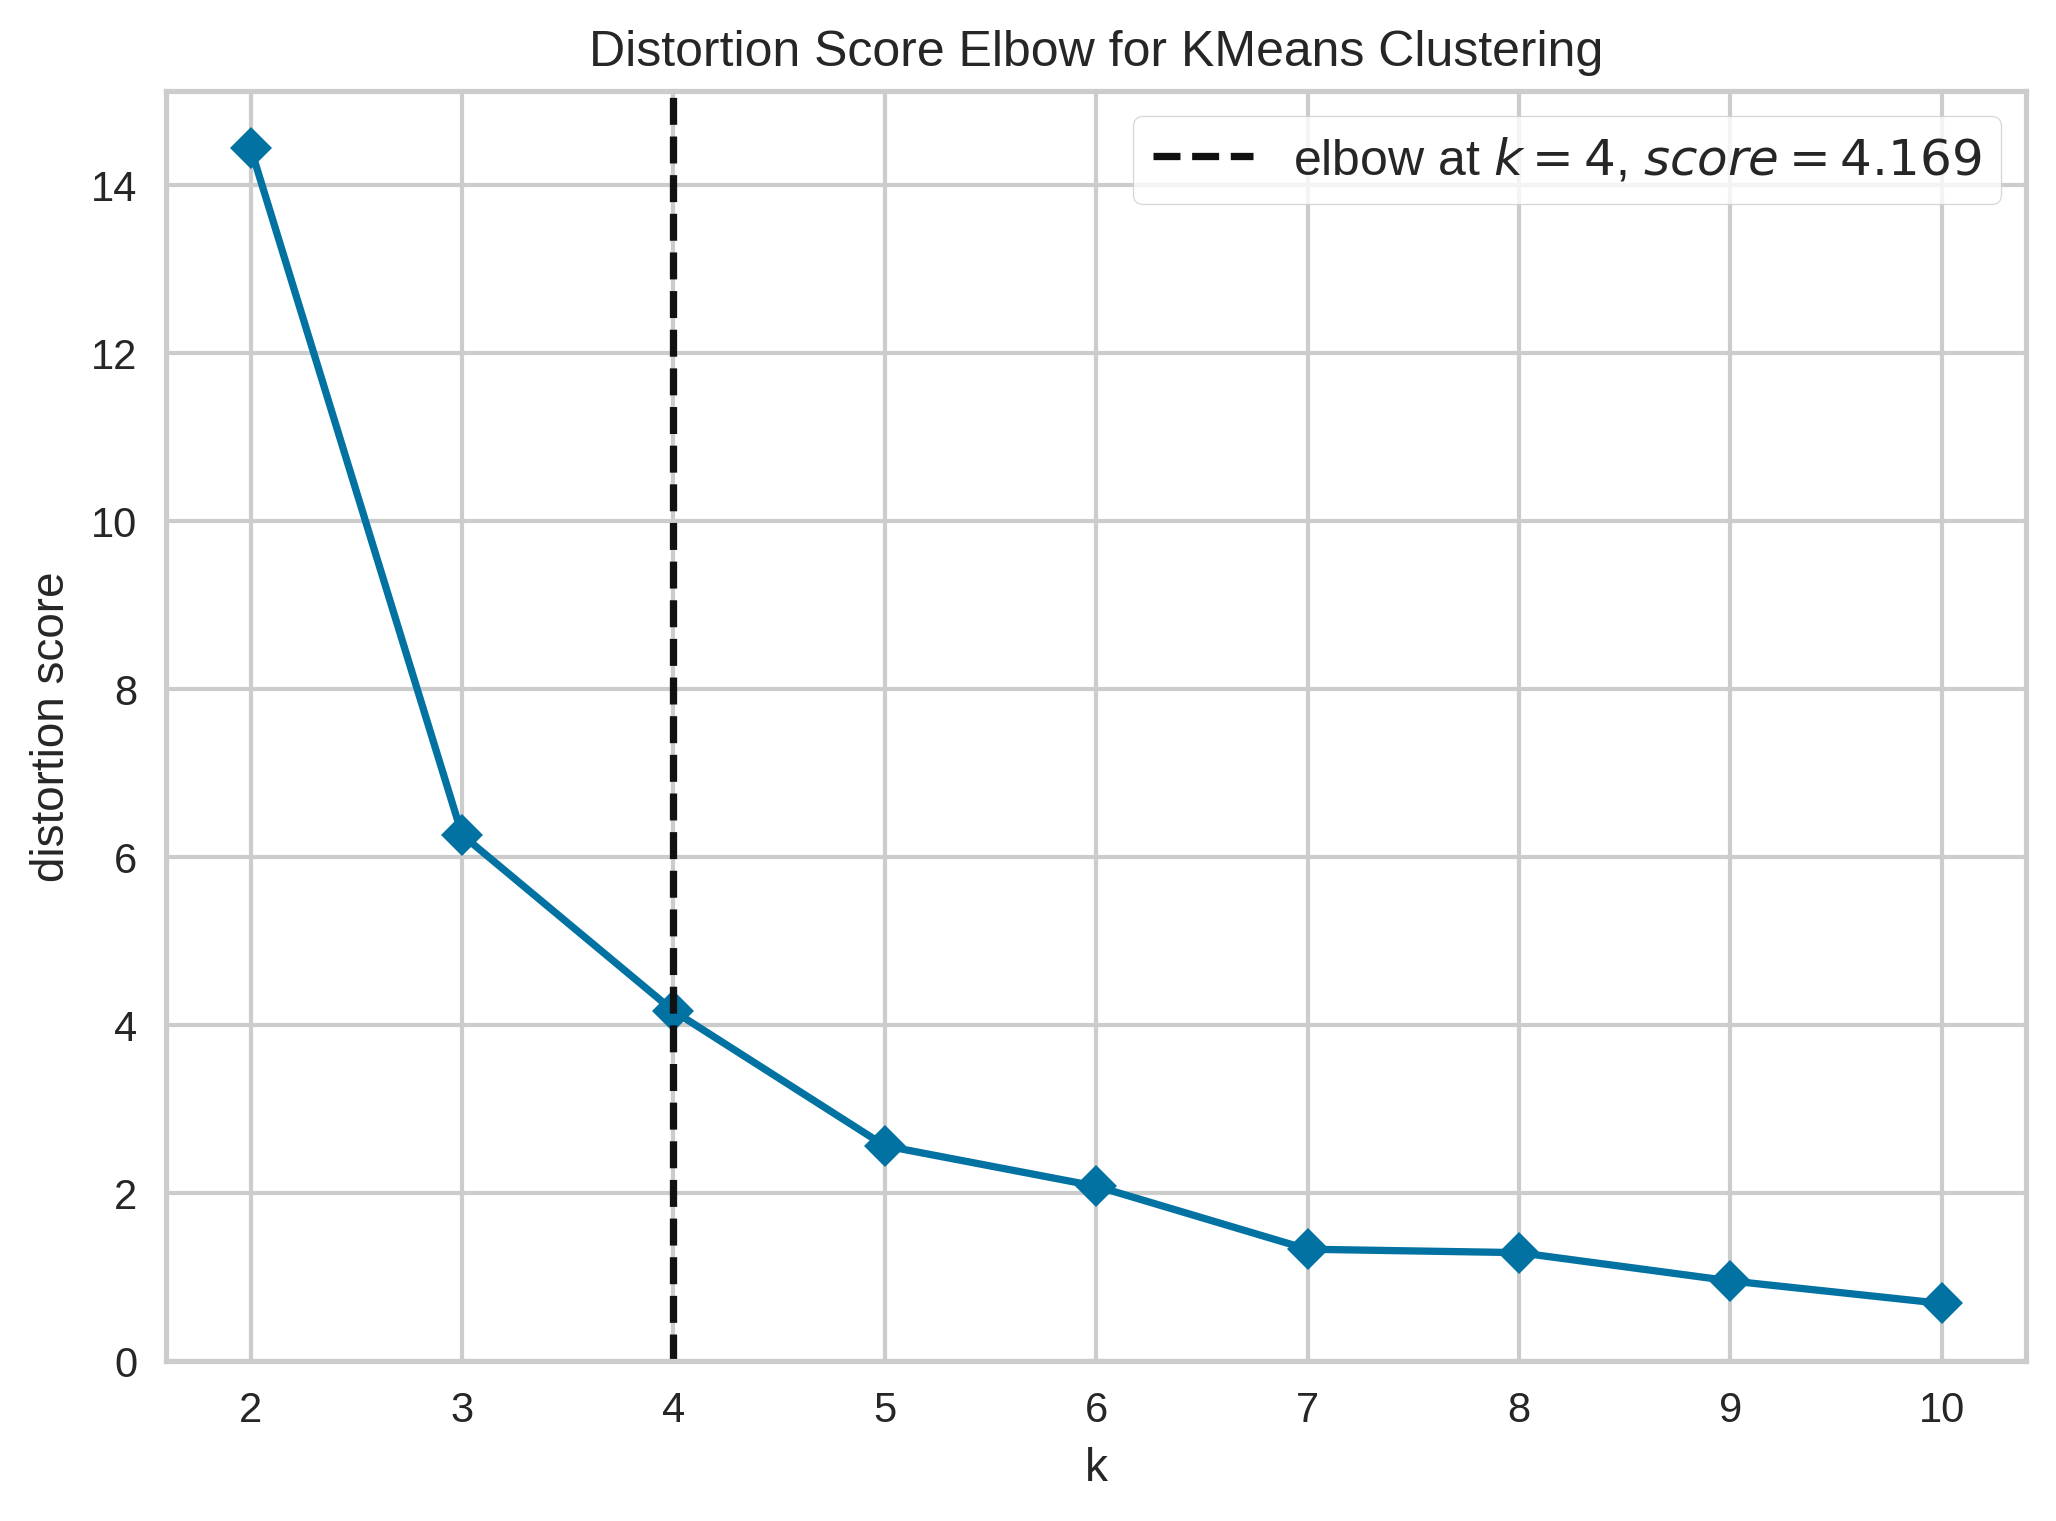

In [ ]:
plot_model(model, 'elbow')

### K-means clustering model validation:
1. Intertia score
2. Silhouette score

```
Refer to comments from panel
```



In [ ]:
# Evaluate the model
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Apply model on data

In [ ]:
model = create_model('kmeans', num_clusters = 4)
plot_model(model,  plot = 'distribution')
# plot_model(model, 'cluster')
save_model(model, f'/content/drive/MyDrive/MS thesis/preliminary site selection/RG{region}/rg{region}-HCFAI-Clusters')
HCFAIdf_results = assign_model(model)
HCFAIdf_results.head(10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5695,41500.7531,0.5199,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


,HCFAI,Cluster
0,0.563186,Cluster 2
1,0.563186,Cluster 2
2,0.563186,Cluster 2
3,0.572306,Cluster 2
4,0.572306,Cluster 2
5,0.563186,Cluster 2
6,0.563186,Cluster 2
7,0.563186,Cluster 2
8,0.563186,Cluster 2
9,0.572306,Cluster 2


# Fixing df for BPNN to find candidate locations

In [ ]:
HCFAIdf_results

,HCFAI,Cluster
0,0.392740,Cluster 0
1,0.435149,Cluster 2
2,0.392740,Cluster 0
3,0.522490,Cluster 1
4,0.570129,Cluster 3
...,...,...
7503,0.490900,Cluster 1
7504,0.379829,Cluster 0
7505,0.419634,Cluster 2
7506,0.379829,Cluster 0


In [ ]:
HCFAIdf_results.rename(columns={'Cluster': 'Accessibility Level'}, inplace=True)

lists = {}

for cluster_number in range(4):
  cluster_name = f"Cluster {cluster_number}"
  cluster_list = HCFAIdf_results.loc[HCFAIdf_results['Accessibility Level'] == cluster_name, 'HCFAI'].tolist()
  lists[cluster_name] = cluster_list

In [ ]:
for cluster_name, cluster_list in lists.items():
    # print(f"Cluster {cluster_name}: {cluster_list}")
    print(f"max, min, total {max(cluster_list)} | {min(cluster_list)} | {len(cluster_list)}")

max, min, total 0.5204814076423645 | 0.4474489688873291 | 3342
max, min, total 0.389999121427536 | 0.3328031301498413 | 2075
max, min, total 0.6579684019088745 | 0.5205960869789124 | 2451
max, min, total 0.4473183751106262 | 0.39017707109451294 | 2649


In [ ]:
x = HCFAIdf_results['HCFAI'].notna() # removing nan values
x = HCFAIdf_results[x]
x.sort_values(by='HCFAI', ascending=False)

,HCFAI,Accessibility Level
555,0.657968,Cluster 2
328,0.657165,Cluster 2
322,0.655710,Cluster 2
1578,0.652083,Cluster 2
1502,0.652083,Cluster 2
...,...,...
2801,0.333969,Cluster 1
2906,0.333969,Cluster 1
2216,0.332803,Cluster 1
2050,0.332803,Cluster 1


In [ ]:
x = x.replace(['Cluster 0'],int(0))
x = x.replace(['Cluster 1'],int(0))
x = x.replace(['Cluster 2'],int(0))
x = x.replace(['Cluster 3'],int(1))

In [ ]:
x['ID'] = IDdf
x

,HCFAI,Accessibility Level,ID
0,0.563186,0,2971819
1,0.563186,0,2971820
2,0.563186,0,2971821
3,0.572306,0,2973198
4,0.572306,0,2973199
...,...,...,...
10512,0.540344,0,3151422
10513,0.540344,0,3151423
10514,0.540344,0,3151424
10515,0.475637,0,3151425


In [ ]:
df = df.merge(x, how='left', on='ID')
df = df.drop_duplicates('ID')
# df = df.drop(['Accessibility Level_x','Accessibility Level_y'], axis=1)
df

,ID,barangay_name,city_name,province_name,popden_chi,popden_eld,popden_wom,popden_w_1,popden_you,popden_all,...,drought_value,buildability_landcov,RHU_Presence,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,HCFAI_x,HCFAI_y,Accessibility Level
0,2971819,Santa Rosa,Santa Fe,Nueva Vizcaya,0.000000,0.000000,0.000000,0.000000,0.000000,0.018628,...,0.788850,1.0,0,0,0,3010498,48.477583,0.563186,0.563186,0
1,2971820,Santa Rosa,Santa Fe,Nueva Vizcaya,0.079848,0.061421,0.497514,0.264112,0.264112,0.019324,...,0.788850,1.0,0,0,0,3010498,49.700157,0.563186,0.563186,0
2,2971821,Santa Rosa,Santa Fe,Nueva Vizcaya,0.117420,0.104102,0.736892,0.370015,0.392883,0.030707,...,0.788850,1.0,0,0,0,3010498,50.744800,0.563186,0.563186,0
3,2973198,Lawigan,Kayapa,Nueva Vizcaya,0.000000,0.000000,0.000000,0.000000,0.000000,0.177869,...,0.711947,1.0,0,0,0,3010498,45.206873,0.572306,0.572306,0
4,2973199,Lawigan,Kayapa,Nueva Vizcaya,0.000000,0.000000,0.000000,0.000000,0.000000,0.042857,...,0.711947,1.0,0,0,0,3010498,46.230098,0.572306,0.572306,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10512,3151422,Maligaya,Palanan,Isabela,0.319667,0.146579,1.164836,0.562926,0.556689,0.345868,...,0.793593,1.0,0,0,0,3086463,66.962931,0.540344,0.540344,0
10513,3151423,Maligaya,Palanan,Isabela,0.319667,0.146579,1.164836,0.562926,0.556689,0.692665,...,0.793593,1.0,0,0,0,3086463,66.930478,0.540344,0.540344,0
10514,3151424,Maligaya,Palanan,Isabela,0.000000,0.000000,0.000000,0.000000,0.000000,0.146973,...,0.793593,1.0,0,0,0,3086463,67.053552,0.540344,0.540344,0
10515,3151425,Dicadyuan,Palanan,Isabela,0.000000,0.000000,0.000000,0.000000,0.000000,1.119415,...,0.866171,1.0,0,0,0,3086463,67.199882,0.475637,0.475637,0


In [ ]:
df.rename(columns = {'Accessibility Level':'Cluster', 'HCFAI_y': 'HCFAI'}, inplace = True)
# df[df['Cluster'] == 1]
df

,ID,barangay_name,city_name,province_name,popden_chi,popden_eld,popden_wom,popden_w_1,popden_you,popden_all,...,drought_value,buildability_landcov,RHU_Presence,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,HCFAI_x,HCFAI,Cluster
0,2971819,Santa Rosa,Santa Fe,Nueva Vizcaya,0.000000,0.000000,0.000000,0.000000,0.000000,0.018628,...,0.788850,1.0,0,0,0,3010498,48.477583,0.563186,0.563186,0
1,2971820,Santa Rosa,Santa Fe,Nueva Vizcaya,0.079848,0.061421,0.497514,0.264112,0.264112,0.019324,...,0.788850,1.0,0,0,0,3010498,49.700157,0.563186,0.563186,0
2,2971821,Santa Rosa,Santa Fe,Nueva Vizcaya,0.117420,0.104102,0.736892,0.370015,0.392883,0.030707,...,0.788850,1.0,0,0,0,3010498,50.744800,0.563186,0.563186,0
3,2973198,Lawigan,Kayapa,Nueva Vizcaya,0.000000,0.000000,0.000000,0.000000,0.000000,0.177869,...,0.711947,1.0,0,0,0,3010498,45.206873,0.572306,0.572306,0
4,2973199,Lawigan,Kayapa,Nueva Vizcaya,0.000000,0.000000,0.000000,0.000000,0.000000,0.042857,...,0.711947,1.0,0,0,0,3010498,46.230098,0.572306,0.572306,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10512,3151422,Maligaya,Palanan,Isabela,0.319667,0.146579,1.164836,0.562926,0.556689,0.345868,...,0.793593,1.0,0,0,0,3086463,66.962931,0.540344,0.540344,0
10513,3151423,Maligaya,Palanan,Isabela,0.319667,0.146579,1.164836,0.562926,0.556689,0.692665,...,0.793593,1.0,0,0,0,3086463,66.930478,0.540344,0.540344,0
10514,3151424,Maligaya,Palanan,Isabela,0.000000,0.000000,0.000000,0.000000,0.000000,0.146973,...,0.793593,1.0,0,0,0,3086463,67.053552,0.540344,0.540344,0
10515,3151425,Dicadyuan,Palanan,Isabela,0.000000,0.000000,0.000000,0.000000,0.000000,1.119415,...,0.866171,1.0,0,0,0,3086463,67.199882,0.475637,0.475637,0


In [ ]:
df.columns

Index(['ID', 'barangay_name', 'city_name', 'province_name', 'popden_chi',
       'popden_eld', 'popden_wom', 'popden_w_1', 'popden_you', 'popden_all',
       'flood_probability_value', 'rain intensity_value', 'drought_value',
       'buildability_landcov', 'RHU_Presence', 'Road_Presence', 'POI_Presence',
       'Nearest_RHU', 'Distance_to_Nearest_RHU_km', 'HCFAI_x', 'HCFAI',
       'Cluster'],
      dtype='object')

In [ ]:
df = df.drop(['HCFAI_x'], axis=1)
df.rename(columns = {'Accessibility Level_x':'Cluster'}, inplace = True)
df

,ID,barangay_name,city_name,province_name,popden_chi,popden_eld,popden_wom,popden_w_1,popden_you,popden_all,...,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,HCFAI,Cluster
0,2971819,Santa Rosa,Santa Fe,Nueva Vizcaya,0.000000,0.000000,0.000000,0.000000,0.000000,0.018628,...,0.459051,0.788850,1.0,0,0,0,3010498,48.477583,0.563186,0
1,2971820,Santa Rosa,Santa Fe,Nueva Vizcaya,0.079848,0.061421,0.497514,0.264112,0.264112,0.019324,...,0.459051,0.788850,1.0,0,0,0,3010498,49.700157,0.563186,0
2,2971821,Santa Rosa,Santa Fe,Nueva Vizcaya,0.117420,0.104102,0.736892,0.370015,0.392883,0.030707,...,0.459051,0.788850,1.0,0,0,0,3010498,50.744800,0.563186,0
3,2973198,Lawigan,Kayapa,Nueva Vizcaya,0.000000,0.000000,0.000000,0.000000,0.000000,0.177869,...,0.468439,0.711947,1.0,0,0,0,3010498,45.206873,0.572306,0
4,2973199,Lawigan,Kayapa,Nueva Vizcaya,0.000000,0.000000,0.000000,0.000000,0.000000,0.042857,...,0.468439,0.711947,1.0,0,0,0,3010498,46.230098,0.572306,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10512,3151422,Maligaya,Palanan,Isabela,0.319667,0.146579,1.164836,0.562926,0.556689,0.345868,...,1.705597,0.793593,1.0,0,0,0,3086463,66.962931,0.540344,0
10513,3151423,Maligaya,Palanan,Isabela,0.319667,0.146579,1.164836,0.562926,0.556689,0.692665,...,1.705597,0.793593,1.0,0,0,0,3086463,66.930478,0.540344,0
10514,3151424,Maligaya,Palanan,Isabela,0.000000,0.000000,0.000000,0.000000,0.000000,0.146973,...,1.705597,0.793593,1.0,0,0,0,3086463,67.053552,0.540344,0
10515,3151425,Dicadyuan,Palanan,Isabela,0.000000,0.000000,0.000000,0.000000,0.000000,1.119415,...,1.755969,0.866171,1.0,0,0,0,3086463,67.199882,0.475637,0


In [ ]:
df.to_csv(f'/content/drive/MyDrive/MS thesis/preliminary site selection/RG{region}/rg{region}_clusters.csv')

# Clustering using all region 1 data

,Description,Value
0,Session id,7652
1,Original data shape,"(4701, 22)"
2,Transformed data shape,"(4701, 6041)"
3,Numeric features,18
4,Categorical features,4
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6990,9670.7545,0.5602,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

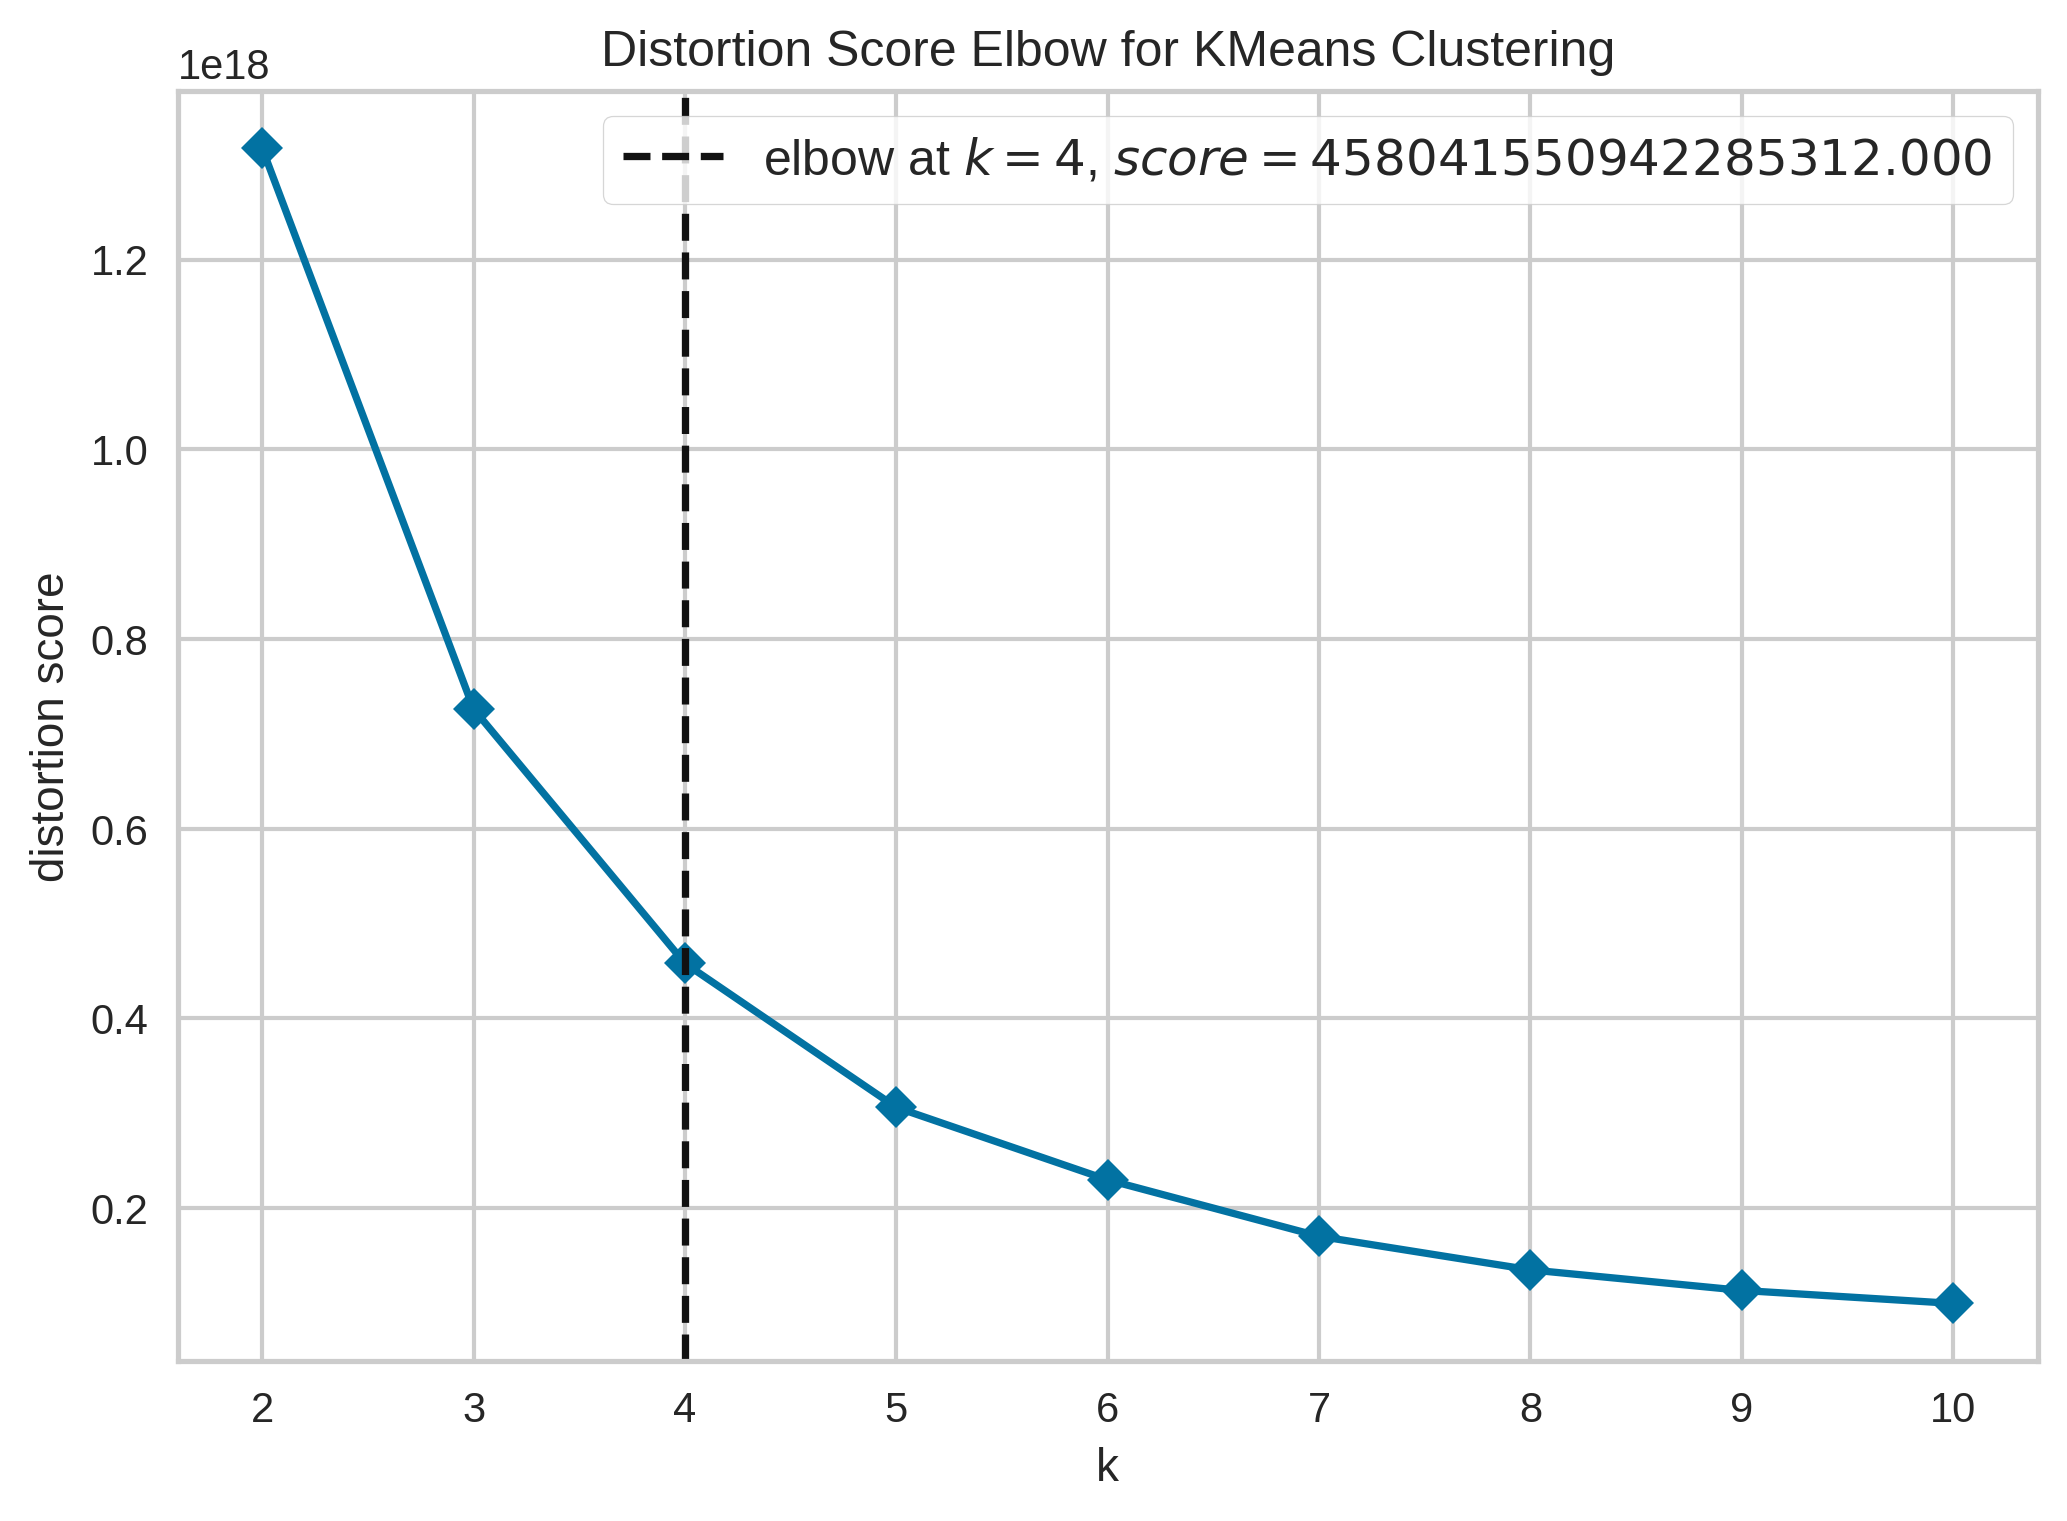

In [ ]:
cluster = setup(df, session_id = 7652)
model = create_model('kmeans')
plot_model(model, 'elbow')

In [ ]:
model = create_model('kmeans', num_clusters = 4)
plot_model(model,  plot = 'distribution')
plot_model(model, 'cluster')
save_model(model, 'Region1-Clusters')
rg1_results = assign_model(model)
rg1_results.head(10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6990,9670.7545,0.5602,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,...,Distance_to_Nearest_RHU_km,population_children_under5,population_elder60plus,population_women,population_youth,population_reproductive_women,popden_all_total_population,Neighbors,HCFAI,Cluster
0,2865422,Ilio-ilio (Iliw-iliw),Burgos,Pangasinan,0.934144,1.178482,0.740358,1.0,0,0,...,29.847534,0.000000,0.000000,0.00000,0.000000,0.000000,4.064488e+05,"2944105, 2944105, 2945487, 2944106, 2945487, 2...",0.500010,Cluster 0
1,2866789,Macaboboni,Agno,Pangasinan,0.734487,1.099466,0.749863,1.0,0,0,...,11.042224,14927.853516,7242.223145,53306.71875,19756.001953,26209.955078,1.697446e+06,"2944105, 2945487, 2944106, 2945487, 2944107, 2...",0.500016,Cluster 0
2,2866790,Macaboboni,Agno,Pangasinan,0.734487,1.099466,0.749863,0.0,0,0,...,11.392127,0.000000,0.000000,0.00000,0.000000,0.000000,2.819701e+06,"2942723, 2942723, 2941342, 2942722, 2941341, 2...",0.499935,Cluster 0
3,2866791,Macaboboni,Agno,Pangasinan,0.734487,1.099466,0.749863,0.0,0,0,...,12.122822,0.000000,0.000000,0.00000,0.000000,0.000000,4.244968e+06,"2956481, 2956481, 2956481, 2956481, 2956481, 2...",0.499960,Cluster 0
4,2866795,Aloleng,Agno,Pangasinan,1.089602,1.154037,0.779155,0.0,0,0,...,15.836811,105878.718750,69201.750000,415210.62500,144285.703125,194110.968750,7.493846e+05,"2956481, 2956481, 2956481, 2956481, 2957864, 2...",0.499835,Cluster 0
5,2866796,Magsaysay,Agno,Pangasinan,0.700863,1.151206,0.800627,0.0,0,0,...,16.685263,0.000000,0.000000,0.00000,0.000000,0.000000,4.021250e+03,"2956481, 2956481, 2956481, 2957864, 2956482, 2...",0.467737,Cluster 0
6,2866797,Tupa,Agno,Pangasinan,0.952087,1.147433,0.793311,1.0,0,0,...,18.265360,0.000000,0.000000,0.00000,0.000000,0.000000,1.469673e+05,"2971765, 2971764, 2971766, 2970382, 2970383, 2...",0.499971,Cluster 0
7,2866798,Gayusan,Agno,Pangasinan,0.853295,1.143231,0.787825,1.0,0,0,...,20.012033,119328.359375,152214.093750,540266.06250,167247.546875,236777.453125,1.637830e+06,"2971764, 2970382, 2970381, 2971764, 2970381, 2...",0.500001,Cluster 0
8,2866799,Gayusan,Agno,Pangasinan,0.853295,1.143231,0.787825,0.0,0,0,...,21.284109,0.000000,0.000000,0.00000,0.000000,0.000000,3.716372e+06,"2971766, 2971767, 2970383, 2970384",0.499971,Cluster 0
9,2866800,Baruan,Agno,Pangasinan,0.926651,1.173055,0.762978,0.0,0,0,...,22.080393,0.000000,0.000000,0.00000,0.000000,0.000000,8.700532e+05,"2971767, 2971768, 2970384, 2970385",0.499882,Cluster 0


In [ ]:
rg1_results.rename(columns = {'Cluster':'Accessibility Level'}, inplace = True)
low = []
midlow = []
midhigh = []
high = []

for x in range(5729):
    if rg1_results['Accessibility Level'][x] == "Cluster 0":
        midlow.append(rg1_results["HCFAI"][x])
    elif rg1_results['Accessibility Level'][x] == "Cluster 1":
        low.append(rg1_results["HCFAI"][x])
    elif rg1_results['Accessibility Level'][x] == "Cluster 2":
        high.append(rg1_results["HCFAI"][x])
    elif rg1_results['Accessibility Level'][x] == "Cluster 3":
        midhigh.append(rg1_results["HCFAI"][x])

KeyError: 4701

In [ ]:
print(f'CLUSTER 1 - Max: {max(low)} min: {min(low)} total number: {len(low)}')
print(f'CLUSTER 0 - Max: {max(midlow)} min: {min(midlow)} total number: {len(midlow)}')
print(f'CLUSTER 2 - Max: {max(high)} min: {min(high)} total number: {len(high)}')
print(f'CLUSTER 3 - Max: {max(midhigh)} min: {min(midhigh)} total number: {len(midhigh)}')

In [ ]:
mid_to_high = []
for i in list(df['HCFAI']):
    if i >= 0.53:
        mid_to_high.append(i)

# Assuming original_df is your original DataFrame
filtered_original_df = df[df['HCFAI'].isin(mid_to_high)]
print(filtered_original_df)